In [92]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [93]:
zipcodes = gpd.read_file('tn_zipcodes.json')

In [94]:
print(zipcodes.crs)
zipcodes.head()

epsg:4326


,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,47,37710,4737710,B5,G6350,S,211712025,0,+36.1586321,-084.3161341,N,"POLYGON ((-84.27434 36.13099, -84.27447 36.130..."
1,47,37381,4737381,B5,G6350,S,360489702,38482384,+35.6871804,-084.8769930,N,"POLYGON ((-84.80164 35.76971, -84.80163 35.769..."
2,47,37701,4737701,B5,G6350,S,27309005,28530,+35.7927401,-083.9860671,N,"POLYGON ((-83.98049 35.82693, -83.98045 35.826..."
3,47,37886,4737886,B5,G6350,S,113625372,0,+35.7455878,-083.8047184,N,"POLYGON ((-83.89972 35.67276, -83.89920 35.672..."
4,47,37757,4737757,B5,G6350,S,72942123,8907166,+36.2990089,-084.1372987,N,"MULTIPOLYGON (((-84.15754 36.35430, -84.15683 ..."


In [95]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   631 non-null    object  
 1   ZCTA5CE10   631 non-null    object  
 2   GEOID10     631 non-null    object  
 3   CLASSFP10   631 non-null    object  
 4   MTFCC10     631 non-null    object  
 5   FUNCSTAT10  631 non-null    object  
 6   ALAND10     631 non-null    int64   
 7   AWATER10    631 non-null    int64   
 8   INTPTLAT10  631 non-null    object  
 9   INTPTLON10  631 non-null    object  
 10  PARTFLG10   631 non-null    object  
 11  geometry    631 non-null    geometry
dtypes: geometry(1), int64(2), object(9)
memory usage: 59.3+ KB


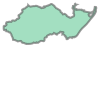

In [96]:
zipcodes.loc[0, 'geometry']

<AxesSubplot:>

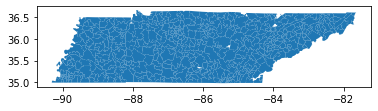

In [97]:
zipcodes.plot()

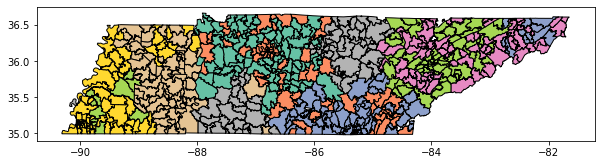

In [99]:
#leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            #'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'ZCTA5CE10', figsize=(10, 10),
              edgecolor = 'black',
              #legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [100]:
poverty_z = pd.read_csv('poverty_tn.csv')
poverty_z.head()

,Unnamed: 0,#,Zip Code,City,Population,% Poverty Level,National Rank,lat,lng
0,0,1,38126,"Memphis, Tennessee","8,104",93.08%,#77,35.126608,-90.042212
1,1,2,37408,"Chattanooga, Tennessee","1,935",91.84%,#82,35.029019,-85.310872
2,2,3,37410,"Chattanooga, Tennessee","4,822",74.63%,#231,35.001899,-85.314220
3,3,4,37915,"Knoxville, Tennessee","5,564",67.16%,#356,35.971478,-83.899274
4,4,5,38105,"Memphis, Tennessee","8,976",66.11%,#376,35.150642,-90.033969


In [101]:
poverty_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       609 non-null    int64  
 1   #                609 non-null    int64  
 2   Zip Code         609 non-null    int64  
 3   City             609 non-null    object 
 4   Population       609 non-null    object 
 5   % Poverty Level  609 non-null    object 
 6   National Rank    609 non-null    object 
 7   lat              609 non-null    float64
 8   lng              609 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 42.9+ KB


In [82]:
poverty['geometry'] = poverty.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
poverty.head(3)



,#,Zip Code,City,Population,% Poverty Level,National Rank,lat,lng,geometry
0,1,38126,"Memphis, Tennessee","8,104",93.08%,#77,35.126608,-90.042212,POINT (-90.04221200000001 35.126608)
1,2,37408,"Chattanooga, Tennessee","1,935",91.84%,#82,35.029019,-85.310872,POINT (-85.310872 35.029019)
2,3,37410,"Chattanooga, Tennessee","4,822",74.63%,#231,35.001899,-85.314220,POINT (-85.31421999999999 35.001899)


In [83]:
poverty.head(1)

,#,Zip Code,City,Population,% Poverty Level,National Rank,lat,lng,geometry
0,1,38126,"Memphis, Tennessee","8,104",93.08%,#77,35.126608,-90.042212,POINT (-90.04221200000001 35.126608)


In [84]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [85]:
poverty_geo = gpd.GeoDataFrame(poverty, 
                           crs = zipcodes.crs, 
                           geometry = poverty['geometry'])
type(poverty_geo)

geopandas.geodataframe.GeoDataFrame

In [102]:
zipcodes = zipcodes.rename(columns = {'ZCTA5CE10':'zip'})

In [103]:
zipcodes = zipcodes[['zip', 'geometry']]

In [104]:
#p_zip = pd.merge(left = zipcodes, right= poverty_z,
                #left_on = 'zip', right_on = 'Zip Codes')
#p_zip.head()

In [30]:
poverty_zip = gpd.sjoin(poverty_geo, zipcodes, op = 'within')

In [24]:
poverty_zip.head()

,#,Zip Code,City,Population,% Poverty Level,National Rank,lat,lng,geometry,index_right,zip
0,1,38126,"Memphis, Tennessee","8,104",93.08%,#77,35.126608,-90.042212,POINT (-90.04221 35.12661),80,38126
1,2,37408,"Chattanooga, Tennessee","1,935",91.84%,#82,35.029019,-85.310872,POINT (-85.31087 35.02902),440,37408
2,3,37410,"Chattanooga, Tennessee","4,822",74.63%,#231,35.001899,-85.314220,POINT (-85.31422 35.00190),441,37410
3,4,37915,"Knoxville, Tennessee","5,564",67.16%,#356,35.971478,-83.899274,POINT (-83.89927 35.97148),59,37915
4,5,38105,"Memphis, Tennessee","8,976",66.11%,#376,35.150642,-90.033969,POINT (-90.03397 35.15064),548,38105


In [44]:
povertyz = poverty_zip.rename(columns = {'% Poverty Level': 'poverty'})
povertyz

,#,Zip Code,City,Population,poverty,National Rank,lat,lng,geometry,index_right,zip
0,1,38126,"Memphis, Tennessee","8,104",93.08%,#77,35.126608,-90.042212,POINT (-90.04221 35.12661),80,38126
1,2,37408,"Chattanooga, Tennessee","1,935",91.84%,#82,35.029019,-85.310872,POINT (-85.31087 35.02902),440,37408
2,3,37410,"Chattanooga, Tennessee","4,822",74.63%,#231,35.001899,-85.314220,POINT (-85.31422 35.00190),441,37410
3,4,37915,"Knoxville, Tennessee","5,564",67.16%,#356,35.971478,-83.899274,POINT (-83.89927 35.97148),59,37915
4,5,38105,"Memphis, Tennessee","8,976",66.11%,#376,35.150642,-90.033969,POINT (-90.03397 35.15064),548,38105
...,...,...,...,...,...,...,...,...,...,...,...
595,596,37220,"Nashville, Tennessee","6,163",1.68%,"#30,936",36.068452,-86.793116,POINT (-86.79312 36.06845),575,37220
596,597,37028,"Bumpus Mills, Tennessee",497,1.44%,"#31,000",36.634248,-87.854188,POINT (-87.85419 36.63425),483,37028
597,598,37140,"Only, Tennessee","1,246",1.28%,"#31,035",35.860974,-87.660782,POINT (-87.66078 35.86097),448,37140
602,603,37394,"Viola, Tennessee",49,0.00%,"#31,480",35.538301,-85.860898,POINT (-85.86090 35.53830),559,37394


In [50]:
povertyz['poverty'] = povertyz.poverty.apply(lambda x: format(float(x.split('%')[0]), '.4f'))
print(povertyz)

       #  Zip Code                     City Population  poverty National Rank  \
0      1     38126       Memphis, Tennessee      8,104  93.0800           #77   
1      2     37408   Chattanooga, Tennessee      1,935  91.8400           #82   
2      3     37410   Chattanooga, Tennessee      4,822  74.6300          #231   
3      4     37915     Knoxville, Tennessee      5,564  67.1600          #356   
4      5     38105       Memphis, Tennessee      8,976  66.1100          #376   
..   ...       ...                      ...        ...      ...           ...   
595  596     37220     Nashville, Tennessee      6,163   1.6800       #30,936   
596  597     37028  Bumpus Mills, Tennessee        497   1.4400       #31,000   
597  598     37140          Only, Tennessee      1,246   1.2800       #31,035   
602  603     37394         Viola, Tennessee         49   0.0000       #31,480   
607  608     38542        Allred, Tennessee         42   0.0000       #31,651   

           lat        lng  

In [51]:
povertyz

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 608 entries, 0 to 607
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   #              608 non-null    int64   
 1   Zip Code       608 non-null    int64   
 2   City           608 non-null    object  
 3   Population     608 non-null    object  
 4   poverty        608 non-null    object  
 5   National Rank  608 non-null    object  
 6   lat            608 non-null    float64 
 7   lng            608 non-null    float64 
 8   geometry       608 non-null    geometry
 9   index_right    608 non-null    int64   
 10  zip            608 non-null    object  
dtypes: float64(2), geometry(1), int64(3), object(5)
memory usage: 57.0+ KB


In [53]:
povertyz['poverty'] = povertyz['poverty'].astype(float)
povertyz.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 608 entries, 0 to 607
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   #              608 non-null    int64   
 1   Zip Code       608 non-null    int64   
 2   City           608 non-null    object  
 3   Population     608 non-null    object  
 4   poverty        608 non-null    float64 
 5   National Rank  608 non-null    object  
 6   lat            608 non-null    float64 
 7   lng            608 non-null    float64 
 8   geometry       608 non-null    geometry
 9   index_right    608 non-null    int64   
 10  zip            608 non-null    object  
dtypes: float64(3), geometry(1), int64(3), object(4)
memory usage: 57.0+ KB


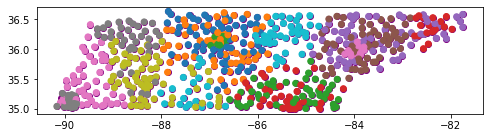

In [54]:
ax = poverty_geo.plot(figsize = (8, 10), color = 'purple')
povertyz.plot( ax = ax, column = 'zip');
plt.show();

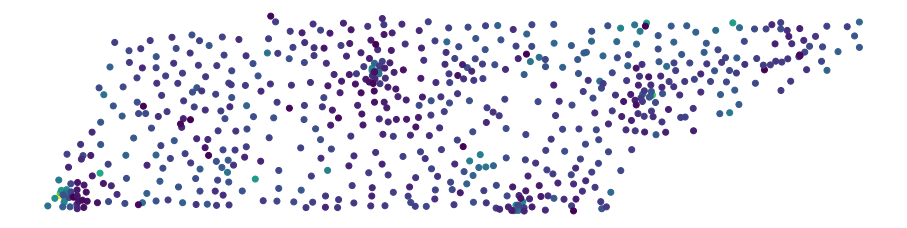

In [55]:
fig, ax = plt.subplots(figsize=(16,4))
povertyz.plot(column = 'poverty', 
              ax = ax)
ax.axis('off');

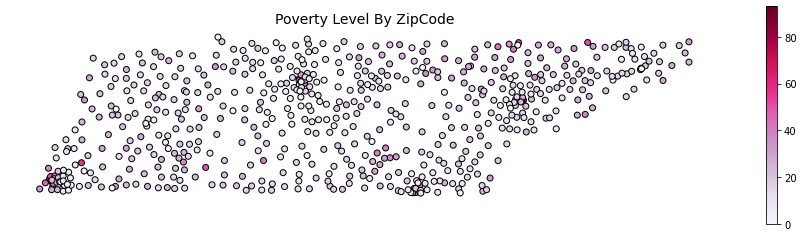

In [57]:
fig, ax = plt.subplots(figsize=(16,4))
povertyz.plot(column = 'poverty', 
              cmap = 'PuRd', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Poverty Level By ZipCode', fontsize = 14)
ax.axis('off');

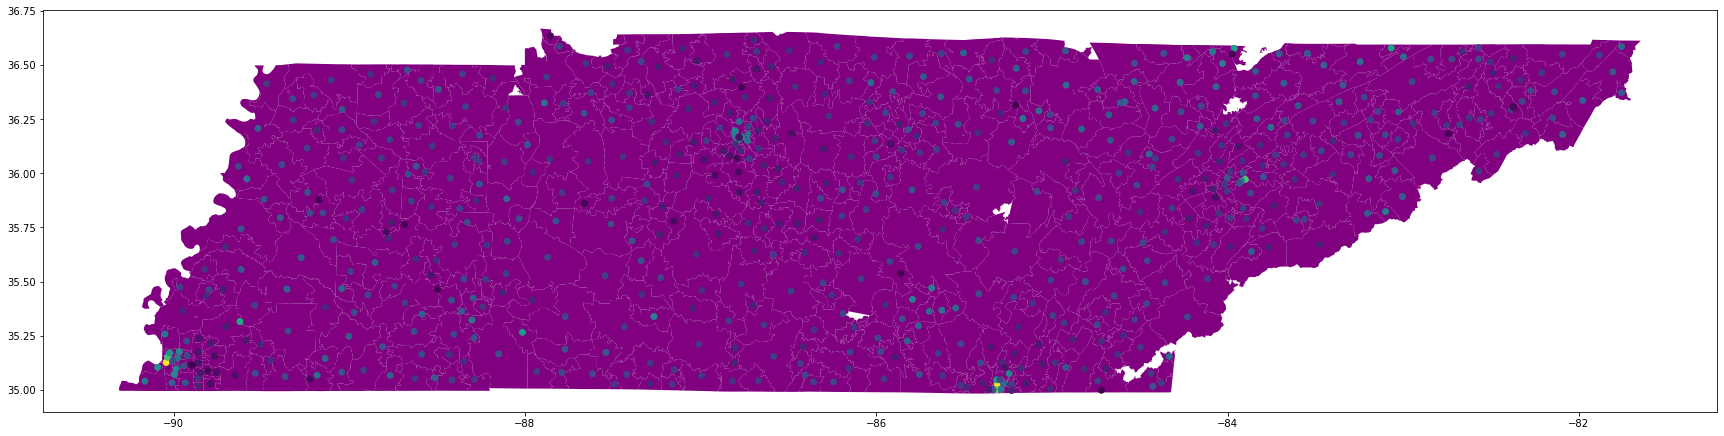

In [108]:
ax = zipcodes.plot(figsize = (30, 30), color = 'purple')
povertyz.plot( ax = ax, column = 'poverty');
plt.show();

In [113]:
#poverty_map = folium.Map([36.1627, -86.7816], zoom_start=7)

#folium.GeoJson(zipcodes).add_to(poverty_map)

#marker_cluster = MarkerCluster().add_to(poverty_map)

#for row_index, row_values in povertyz.iterrows():
    #loc = [row_values['lat'], row_values['lng']]
    #pop = str(row_values['poverty'])
    #icon=folium.Icon(color='beige', icon='percent', prefix='fa')
    
    #marker = folium.Marker(
        #location = loc,
        #popup = pop, icon = icon)
    
    #marker.add_to(poverty_map)
    
#poverty_map

In [115]:
#poverty_map = folium.Map([36.1627, -86.7816], tiles="CartoDB Positron", zoom_start=7)

#folium.GeoJson(zipcodes).add_to(poverty_map)

#locations = povertyz[['lat','lng']].values.tolist()
#poverty_map.add_child(
        #FastMarkerCluster(locations)
#)

#poverty_map